In [1]:
def unpickle(file):
    '''
        Unpickle image data file downloaded from https://www.cs.toronto.edu/~kriz/cifar.html
    '''
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding = 'bytes')
    return dict


In [64]:
import numpy as np
import matplotlib.pyplot as plt

## Data is downloaded from https://www.cs.toronto.edu/~kriz/cifar.html
##  Exploring download content

In [257]:
import os
print('Download Files: ', [file for file in os.listdir('./cifar-100-python')])

Download Files:  ['file.txt~', 'meta', 'test', 'train']


### 1. Extracting train data from the file 'train'

In [209]:
train_dict = unpickle('./cifar-100-python/train')
print('Keys in train_dict: ', [key.decode('utf-8') for key in train_dict.keys()])
train_filenames = [filename.decode('utf-8') for filename in train_dict[b'filenames']]
train_fine_labels = train_dict[b'fine_labels']
train_coarse_labels = train_dict[b'coarse_labels']
train_images = train_dict[b'data']
# Reshape train_images to (#images, height, width, channels)
train_images = train_images.reshape(len(train_images), 3, 32, 32).transpose(0, 2, 3, 1)
img_idx = 0
print("Example file name: ", train_filenames[img_idx])
print("Unique fine labels: ", sorted(set(train_fine_labels)))
print("Verify that fine labels are integers 0-99: ", all([each1 == each2 for each1, each2 in zip(sorted(list(set(train_fine_labels))), range(0,100))]))
print("Unique coarse labels: ", set(train_coarse_labels))
print("Verify that coarse labels are integers from 0-19: ", all([each1 == each2 for each1, each2 in zip(sorted(list(set(train_coarse_labels))), range(0,100))]))
print("The number of images in the train dataset: ", train_images.shape[0])
print("Dimension of train_images: ", train_images.shape)
del img_idx

Keys in train_dict:  ['filenames', 'batch_label', 'fine_labels', 'coarse_labels', 'data']
Example file name:  bos_taurus_s_000507.png
Unique fine labels:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
Verify that fine labels are integers 0-99:  True
Unique coarse labels:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
Verify that coarse labels are integers from 0-19:  True
The number of images in the train dataset:  50000
Dimension of train_images:  (50000, 32, 32, 3)


### 2. Extracting train data from the file 'test'

In [265]:
test_dict = unpickle('./cifar-100-python/test')
print('Keys in test_dict: ', [key.decode('utf-8') for key in test_dict.keys()])
test_filenames = [filename.decode('utf-8') for filename in test_dict[b'filenames']]
test_fine_labels = test_dict[b'fine_labels']
test_coarse_labels = test_dict[b'coarse_labels']
test_images = test_dict[b'data']
# Reshape train_images to (#images, height, width, channels)
test_images = test_images.reshape(len(test_images), 3, 32, 32).transpose(0, 2, 3, 1)
print("The number of images in the test dataset: ", test_images.shape[0])

Keys in test_dict:  ['filenames', 'batch_label', 'fine_labels', 'coarse_labels', 'data']
The number of images in the test dataset:  10000


### 3. The image labels in the file train are all integer indices.
#### These indices map to the label names stored in the dictionary stored in file 'meta'

In [253]:
meta = unpickle('./cifar-100-python/meta')
print("Keys in the file meta: ", [each.decode('utf-8') for each in meta.keys()])

Keys in the file meta:  ['fine_label_names', 'coarse_label_names']


#### Extract Class Names, create two dictionaries int_to_class and class_to_int

In [ ]:
fine_label_names = [each.decode('utf-8') for each in meta[b'fine_label_names']]
class_to_int = {k: v for k,v in zip(fine_label_names, range(0, len(fine_label_names)))}
int_to_class = {item[1]:item[0] for item in class_to_int.items()}

#### Extract Superclass Names, create wto dictionaries int_to_superclass and superclass_to_int

In [ ]:
coarse_label_names = [each.decode('utf-8') for each in meta[b'coarse_label_names']]
superclass_to_int = {k: v for k,v in zip(coarse_label_names, range(0, len(coarse_label_names)))}
int_to_superclass = {item[1]:item[0] for item in superclass_to_int.items()}

#### Because there's no mapping between superclass and class provided, we build it using the training data
#### Build: Create variables class_to_superclass and superclass_to_classes

In [254]:
class_to_superclass = {fine: coarse for fine, coarse in zip(train_fine_labels, train_coarse_labels)}
class_to_superclass = dict(sorted(class_to_superclass.items(), key = lambda each: each[0]))
superclass_to_classes = {}
for item in class_to_superclass.items():
    if item[1] not in superclass_to_classes.keys():
        superclass_to_classes[item[1]] = [item[0]]
    else:
        superclass_to_classes[item[1]].append(item[0])
superclass_to_classes = dict(sorted(superclass_to_classes.items(), key = lambda each: each[0]))

In [255]:
print("The number of classes: ",len(int_to_class))
print("The number of superclasses: ", len(int_to_superclass))
print("One example superclass with index 0: ", int_to_superclass[0])
print("Corresponding classes: ")
for each in superclass_to_classes[0]:
    print("\t -", int_to_class[each])

The number of classes:  100
The number of superclasses:  20
One example superclass with index 0:  aquatic_mammals
Corresponding classes: 
	 - beaver
	 - dolphin
	 - otter
	 - seal
	 - whale


### 4. Display images with their superclass-class

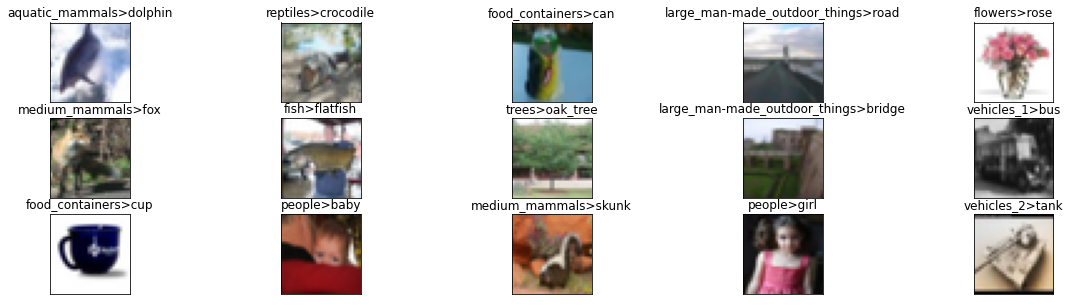

In [260]:
def display_images(imageset, image_fine_labels, image_coarse_labels, int_to_class, int_to_superclass):
    columns = 5
    rows = 3
    random_indices = np.random.randint(low = 0, high = len(imageset), size = rows * columns)
    fig = plt.figure(figsize = (20, 5))
    axes = []
    for i in range(1, rows * columns + 1):
        image = imageset[random_indices[i-1]]
        axes.append(fig.add_subplot(rows, columns, i))
        img_title = int_to_superclass[image_coarse_labels[random_indices[i-1]]] + '>' +\
                    int_to_class[image_fine_labels[random_indices[i-1]]]
        axes[i-1].set_title(img_title)
        plt.imshow(image)
    for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

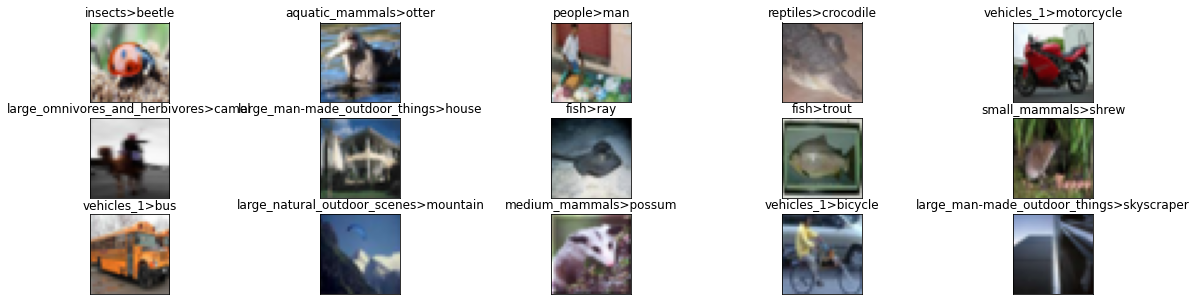

In [267]:
#### Display random train images
display_images(train_images, train_fine_labels, train_coarse_labels, int_to_class, int_to_superclass)

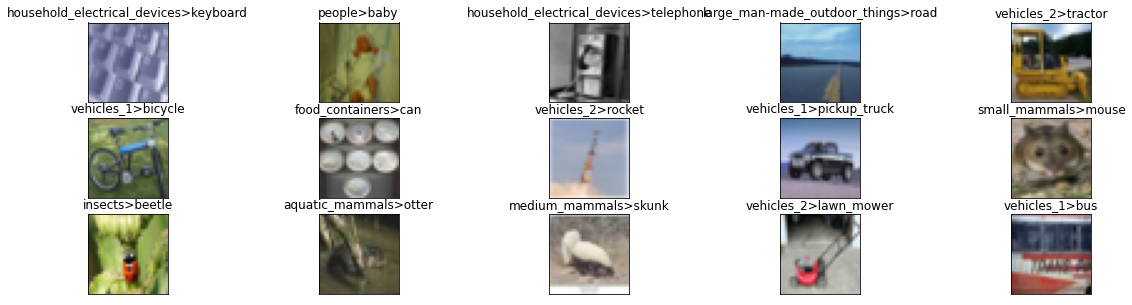

In [268]:
#### Display random test images
display_images(test_images, test_fine_labels, test_coarse_labels, int_to_class, int_to_superclass)